In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


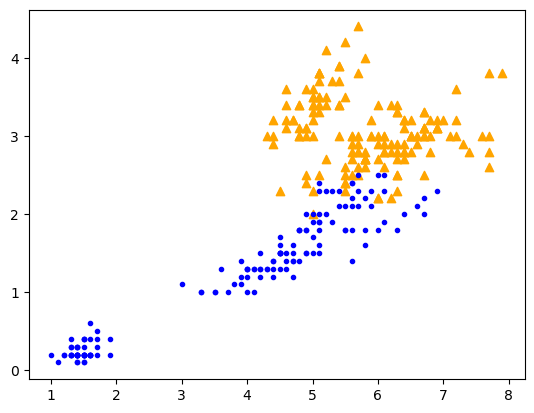

In [34]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='orange',marker='^')
plt.scatter(df['petal length (cm)'], df['petal width (cm)'],color="blue",marker='.')

In [35]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis='columns')
y = df.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

127    2
87     1
50     1
65     1
73     1
      ..
57     1
51     1
86     1
39     0
20     0
Name: target, Length: 120, dtype: int32

In [46]:
X.iloc[:,2:4]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [37]:
from sklearn.svm import SVC
svm_model = SVC()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
params = {
    'C':[1, 10, 100], 'gamma':[0.1, 0.01, 0.001]
}

In [40]:
svm_tuned = GridSearchCV(svm_model, params, cv=6, verbose=10)

In [41]:
%%time
svm_tuned.fit(x_train, y_train)

Fitting 6 folds for each of 9 candidates, totalling 54 fits
[CV 1/6; 1/9] START C=1, gamma=0.1..............................................
[CV 1/6; 1/9] END ...............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/6; 1/9] START C=1, gamma=0.1..............................................
[CV 2/6; 1/9] END ...............C=1, gamma=0.1;, score=0.850 total time=   0.0s
[CV 3/6; 1/9] START C=1, gamma=0.1..............................................
[CV 3/6; 1/9] END ...............C=1, gamma=0.1;, score=0.950 total time=   0.0s
[CV 4/6; 1/9] START C=1, gamma=0.1..............................................
[CV 4/6; 1/9] END ...............C=1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 5/6; 1/9] START C=1, gamma=0.1..............................................
[CV 5/6; 1/9] END ...............C=1, gamma=0.1;, score=0.950 total time=   0.0s
[CV 6/6; 1/9] START C=1, gamma=0.1..............................................
[CV 6/6; 1/9] END ...............C=1, gamma=0.1;,

[CV 4/6; 9/9] END ...........C=100, gamma=0.001;, score=1.000 total time=   0.0s
[CV 5/6; 9/9] START C=100, gamma=0.001..........................................
[CV 5/6; 9/9] END ...........C=100, gamma=0.001;, score=0.900 total time=   0.0s
[CV 6/6; 9/9] START C=100, gamma=0.001..........................................
[CV 6/6; 9/9] END ...........C=100, gamma=0.001;, score=1.000 total time=   0.0s
CPU times: total: 109 ms
Wall time: 433 ms


GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]},
             verbose=10)

In [42]:
svm_tuned.best_params_
svm_best = svm_tuned.best_estimator_
svm_best

SVC(C=10, gamma=0.1)

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay
# DecisionBoundaryDisplay.from_estimator(svm_best, )
DecisionBoundaryDisplay.from_estimator(
    svm_best, X.iloc[:,2:4], response_method="predict", cmap=plt.cm.Spectral, alpha=0.8, xlabel=iris.feature_names[2], ylabel=iris.feature_names[3]
)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- sepal length (cm)
- sepal width (cm)


In [ ]:
DecisionBoundaryDisplay.from_estimator( svm, X, response_method="predict", cmap=plt.cm.Spectral, alpha=0.8, xlabel=cancer.feature_names[0], ylabel=cancer.feature_names[1], )
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import StandardScaler

# # Generate a 2D classification dataset
# X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Train an SVM model
# svm_model2 = SVC(C=100, gamma=0.01, kernel='rbf')
# svm_model2.fit(X_scaled, y)

# # Create a mesh grid for plotting decision boundary
# h = 0.02  # step size in the mesh
# x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
# y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Predict values for the mesh grid
# Z = svm_model2.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot decision boundary and support vectors
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
# plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
# plt.scatter(svm_model2.support_vectors_[:, 0], svm_model2.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# plt.title("SVM Decision Boundary with C=100, gamma=0.01")
# plt.legend()
# plt.show()
